# Data Science Capstone Project - Week 2

## INTRODUCTION

The Lebanon kitchen is immensely famous for the variety of spices and ingredients. The mouth-watering authentic flavorful recipes are well known throughout the world. In Lebanon, most local restaurants serve typical Lebanese mezze, an array of more than 60 small hot and cold, fresh savory dishes, mostly eaten with bread (‘khebbez’). Lebanon, especially Beirut, is crammed with attractive restaurants, lunch places and bars. For each destination, a selection of bars, restaurants and other eateries is provided.

The City of New York, is the most populous city in the United States. It is diverse and is the financial capital of USA. It is multicultural. It provides lot of business opportunities and business friendly environment. It has attracted many different players into the market.

A Lebanese businessman approached me, Data Scientist Consultant, aiming to open a Lebanese Food Restaurant in New York. The location of the restaurant is one of the important decisions that will determine whether the restaurant will be profitable or not.

## Business Problem

The objective of this Capstone Project is to analyze and select the best location in New York City to open the Lebanese Restaurant. Using state-of-the-art machine learning techniques like clustering, this project aims to help answer the business question: Which neighborhood is the most favorable one for the Businessman to consider for his new Lebanese Restaurant?

## Target Audience
This project is extremely useful to all businessmen and investors aiming to open or invest in a new restaurant in New York City. 


## Data
We will need the following data in order to solve the current problem:
* List of Neighborhoods in New York. 
* Latitude and Longitude coordinates of each Neighborhood. This will allow us to plot the map and to get the venues in each neighborhood.
* Venue data, especially the ones related to Lebanese Restaurants (used for clustering)

 Sources of Data and Methods:
* New York City data will be downloaded from the following website: <https://geo.nyu.edu/catalog/nyu_2451_34572> 
* Geographical coordinates of the neighborhoods using Python Geocoder package
* Foursquare API to get the Venue Data 


In [85]:
# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


## Downloading and Exploring Dataset

In [9]:
with open (r"C:\Users\anthonytawk\Desktop\New York Dataset.json") as f:
    newyork_data = json.load(f)
    

In [11]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [14]:
#Neighborhoods Data is save in the Features Element of the Json File
neighborhoods_data = newyork_data['features']

In [15]:
#Let's examine the first Neighborhood
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

## Create a Dataframe for the Neighborhoods Data

In [17]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the empty dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [18]:
#Let's Loop over each neighborhood in neighborhoods data and fill the DataFrame
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [19]:
#Let us examine the Dataframe Now
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [30]:
print ('Total Number of Neighborhoods: {}'.format(len(neighborhoods)))
print ('Total Number of Boroughs: {}'.format(len(np.unique(neighborhoods['Borough']))))

Total Number of Neighborhoods: 306
Total Number of Boroughs: 5


## Using Geopy Library to Calculate New York Latitude and Longitude

In [31]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## Creating a Map of New York with its Neighborhoods

In [32]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [54]:
# However Lets Simplifie our project and only consider the neighborhoods in Manhattan. so let's slice the original Dataframe
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()
print('Number of Neighborhoods in Queens: {}'.format(len(manhattan_data)))

Number of Neighborhoods in Queens: 40


In [56]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [59]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

## Define Foursquare Credentials and Version

In [60]:
CLIENT_ID = 'WIB240IAWEC5HDTLQ4FUGAUAMJUF1OXKPXWUDT4R14P1PNVP' # Foursquare ID
CLIENT_SECRET = 'GYEJK30PMS2XTN4GHKJ3VH3L4OV0RZEUNNML2G4QEIRZ1F2F' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WIB240IAWEC5HDTLQ4FUGAUAMJUF1OXKPXWUDT4R14P1PNVP
CLIENT_SECRET:GYEJK30PMS2XTN4GHKJ3VH3L4OV0RZEUNNML2G4QEIRZ1F2F


## Exploring Neighborhoods in Manhattan

In [63]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT = 100, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [67]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3311, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [68]:
#Check the Number of Venues for each Neighborhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,95,95,95,95,95,95
Carnegie Hill,99,99,99,99,99,99
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


In [69]:
#Check the Unique Categories returned from all Venues
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 334 uniques categories.


## Analyze Each Neighborhood

In [71]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping M

In [72]:
manhattan_onehot.shape

(3311, 335)

In [73]:
#Let us group the data and calculate the mean for each category in every neighborhood
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [75]:
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping M

We Notice that Only Greenwich Village contains Lebanese Restaurants. Later on, by clustering neighborhoods, we will determine the neighborhood that is mostly similar to Greenwich Village, where we will recommend the Business Owner to open his Lebanese Restaurant

In [76]:
#The new data contains all 40 neighborhoods in manhattan along with the average for each category in the corresponding neighborhood
manhattan_grouped.shape

(40, 335)

## Print Each Venue With Top 5 Categories

In [77]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0    Coffee Shop  0.07
1           Park  0.07
2          Hotel  0.05
3            Gym  0.04
4  Shopping Mall  0.03


----Carnegie Hill----
                venue  freq
0         Coffee Shop  0.07
1         Pizza Place  0.04
2                Café  0.04
3  Italian Restaurant  0.03
4              Bakery  0.03


----Central Harlem----
                 venue  freq
0   Chinese Restaurant  0.07
1   African Restaurant  0.04
2  American Restaurant  0.04
3                  Bar  0.04
4   Seafood Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.04
3              Bakery  0.04
4           Nightclub  0.03


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2  Vietnamese Restaurant  0.04
3    American Restaurant  0.04
4                    Spa  0.03


----Civic Center----
                  venue  freq


## Create a Dataframe that Returns the 10 Top Venues In Each Neighborhood

In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Park,Hotel,Gym,Shopping Mall,Memorial Site,Plaza,Food Court,Sandwich Place,Clothing Store
1,Carnegie Hill,Coffee Shop,Café,Pizza Place,Yoga Studio,French Restaurant,Japanese Restaurant,Bakery,Italian Restaurant,Bookstore,Gym
2,Central Harlem,Chinese Restaurant,Cosmetics Shop,American Restaurant,Bar,French Restaurant,Seafood Restaurant,African Restaurant,Music Venue,Gym,Café
3,Chelsea,Coffee Shop,Italian Restaurant,Bakery,Ice Cream Shop,Nightclub,American Restaurant,Hotel,Art Gallery,Wine Shop,Theater
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop,Spa,Bakery,Salon / Barbershop,Sandwich Place
5,Civic Center,Coffee Shop,Gym / Fitness Center,French Restaurant,Italian Restaurant,Hotel,Yoga Studio,Spa,Park,Bakery,Cocktail Bar
6,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,American Restaurant,Spa,Wine Shop,Sandwich Place,Gym,Hotel
7,East Harlem,Mexican Restaurant,Latin American Restaurant,Bakery,Deli / Bodega,Thai Restaurant,Fast Food Restaurant,Convenience Store,French Restaurant,Liquor Store,Taco Place
8,East Village,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Chinese Restaurant,Mexican Restaurant,Italian Restaurant,Korean Restaurant,Japanese Restaurant,Speakeasy
9,Financial District,Coffee Shop,Bar,American Restaurant,Gym,Hotel,Pizza Place,Food Truck,Steakhouse,Gym / Fitness Center,Cocktail Bar


## Clustering Neighborhoods

First, We need To Find the optimal number of clusters. In the Lab session, a number of 5 clusters was randomly chosen. In our case, we need to make sure that the number of clusters is optimal. Therefore, we will use the Elbow Curve method. 

In [84]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

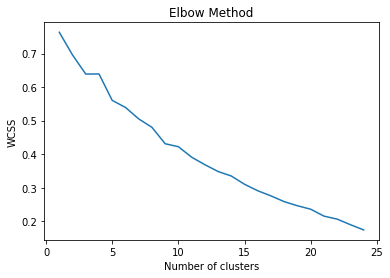

In [88]:
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(manhattan_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As We Can see, there is no clear elbow curve. This may be due to the high dimensionality of the data. Since the data consists of 40 rows (The Neighborhoods) and 334 features (Venue Categories). In order to observe a convergence, we will need to use a dimensionality reduction technique, namely PCA (Principal Component Analysis).

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=26)
pca.fit(manhattan_grouped_clustering)
print(pca.explained_variance_ratio_.sum())

0.9068496727871957


We notice that we can replace the 334 features with 26 artificial components that explain 90% of the variance of our data. Therefore we will apply a transformation with 26 components

In [104]:
transformed_manhattan_grouped = pca.fit_transform(manhattan_grouped_clustering)
transformed_manhattan_grouped.shape

(40, 26)

Now Instead of Having a 334 feature for each neighborhood, we only have 26 significant features

In [105]:
transformed_manhattan_grouped

array([[ 0.02349177, -0.03036898,  0.04167942, ..., -0.00187661,
         0.00423122,  0.00602648],
       [-0.01409838,  0.00522751, -0.00055483, ..., -0.01882095,
        -0.02306899, -0.00786367],
       [-0.00619132, -0.00970132, -0.02237904, ..., -0.01102032,
         0.00625942,  0.00805161],
       ...,
       [ 0.01165734,  0.04939985, -0.00164523, ...,  0.02698345,
        -0.02914546,  0.01159801],
       [-0.03668483, -0.02620841, -0.00019485, ..., -0.02292225,
         0.00744585, -0.03270897],
       [ 0.01796982,  0.00999997, -0.00059517, ...,  0.01418478,
        -0.01022674, -0.00433333]])

Now Let's try to cluster the neighborhoods again

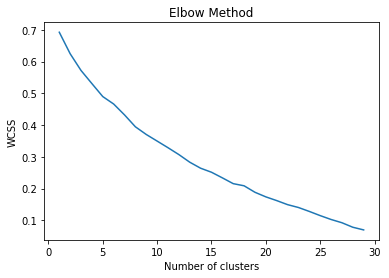

In [110]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(transformed_manhattan_grouped)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Although we cannot detect an elbow that shows the exact cluster numbers, we decide to form 20 clusters out of the 40 neighborhoods.

In [111]:
# set number of clusters
kclusters = 20

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(transformed_manhattan_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 0,  6,  7,  1,  9,  1, 11, 15, 12,  3])

In [113]:
kmeans.labels_

array([ 0,  6,  7,  1,  9,  1, 11, 15, 12,  3, 17,  1, 12,  6, 11,  2,  6,
       11, 17, 19, 16, 13,  8,  3,  5, 14,  3,  1,  4, 18, 10, 12, 11,  2,
       12,  1, 12,  6,  1,  6])

In [114]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,8,Gym,American Restaurant,Sandwich Place,Coffee Shop,Diner,Miscellaneous Shop,Steakhouse,Supplement Shop,Shopping Mall,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,9,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop,Spa,Bakery,Salon / Barbershop,Sandwich Place
2,Manhattan,Washington Heights,40.851903,-73.936900,6,Café,Grocery Store,Bakery,Mobile Phone Shop,Pizza Place,Mexican Restaurant,Spanish Restaurant,Chinese Restaurant,Supermarket,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Spanish Restaurant,Bakery,Deli / Bodega,Park,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,6,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Sandwich Place,Bakery,Caribbean Restaurant,Chinese Restaurant


In [115]:
manhattan_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,8,Gym,American Restaurant,Sandwich Place,Coffee Shop,Diner,Miscellaneous Shop,Steakhouse,Supplement Shop,Shopping Mall,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,9,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop,Spa,Bakery,Salon / Barbershop,Sandwich Place
2,Manhattan,Washington Heights,40.851903,-73.936900,6,Café,Grocery Store,Bakery,Mobile Phone Shop,Pizza Place,Mexican Restaurant,Spanish Restaurant,Chinese Restaurant,Supermarket,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Pizza Place,Restaurant,Café,Lounge,Spanish Restaurant,Bakery,Deli / Bodega,Park,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,6,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Sandwich Place,Bakery,Caribbean Restaurant,Chinese Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,13,Coffee Shop,Park,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Deli / Bodega,Bus Stop,Cosmetics Shop,Café,Bike Trail
6,Manhattan,Central Harlem,40.815976,-73.943211,7,Chinese Restaurant,Cosmetics Shop,American Restaurant,Bar,French Restaurant,Seafood Restaurant,African Restaurant,Music Venue,Gym,Café
7,Manhattan,East Harlem,40.792249,-73.944182,15,Mexican Restaurant,Latin American Restaurant,Bakery,Deli / Bodega,Thai Restaurant,Fast Food Restaurant,Convenience Store,French Restaurant,Liquor Store,Taco Place
8,Manhattan,Upper East Side,40.775639,-73.960508,1,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,Gym / Fitness Center,French Restaurant,Juice Bar,Hotel,Pizza Place
9,Manhattan,Yorkville,40.775930,-73.947118,6,Italian Restaurant,Coffee Shop,Bar,Gym,Deli / Bodega,Pizza Place,Wine Shop,Sushi Restaurant,Japanese Restaurant,Diner


In [116]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## RESULTS

In [117]:
manhattan_merged[manhattan_merged['Cluster Labels'] == 12]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Manhattan,Upper West Side,40.787658,-73.977059,12,Italian Restaurant,Wine Bar,Bar,Coffee Shop,Indian Restaurant,Bakery,Mediterranean Restaurant,Café,Seafood Restaurant,Pizza Place
18,Manhattan,Greenwich Village,40.726933,-73.999914,12,Italian Restaurant,Sushi Restaurant,Clothing Store,Café,French Restaurant,Indian Restaurant,Seafood Restaurant,Cosmetics Shop,Burger Joint,Chinese Restaurant
19,Manhattan,East Village,40.727847,-73.982226,12,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Chinese Restaurant,Mexican Restaurant,Italian Restaurant,Korean Restaurant,Japanese Restaurant,Speakeasy
34,Manhattan,Sutton Place,40.760280,-73.963556,12,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Gym,Coffee Shop,Yoga Studio,Dessert Shop,Beer Garden,Sushi Restaurant,Chinese Restaurant
35,Manhattan,Turtle Bay,40.752042,-73.967708,12,Italian Restaurant,Coffee Shop,Steakhouse,Sushi Restaurant,Wine Bar,Park,Indian Restaurant,Café,Ramen Restaurant,French Restaurant


We notice that these Neighborhoods belong to the same cluster, and as we can notice, they all have similar common venues. We already have lebanese restaurants in Greenwich Village. Therefore, the investor has 4 other neighborhoods where he can establish his new business.